# Assignment No. - 15 : Support Vector Machine (SVM)

# 1) classify the Size_Categorie using SVM

* month month of the year: 'jan' to 'dec'
* day day of the week: 'mon' to 'sun'
* FFMC FFMC index from the FWI system: 18.7 to 96.20
* DMC DMC index from the FWI system: 1.1 to 291.3
* DC DC index from the FWI system: 7.9 to 860.6
* ISI ISI index from the FWI system: 0.0 to 56.10
* temp temperature in Celsius degrees: 2.2 to 33.30
* RH relative humidity in %: 15.0 to 100
* wind wind speed in km/h: 0.40 to 9.40
* rain outside rain in mm/m2 : 0.0 to 6.4
* Size_Categorie the burned area of the forest ( Small , Large)

# Importing library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
forest_fires=pd.read_csv("C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Excelr.dataset\\forestfires.csv")
forest_fires

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


# EDA

In [3]:
forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
#shape of data
forest_fires.shape

(517, 31)

In [5]:
forest_fires.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [6]:
#column names
forest_fires.keys()

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
forest_fires.nunique()

month             12
day                7
FFMC             106
DMC              215
DC               219
ISI              119
temp             192
RH                75
wind              21
rain               7
area             251
dayfri             2
daymon             2
daysat             2
daysun             2
daythu             2
daytue             2
daywed             2
monthapr           2
monthaug           2
monthdec           2
monthfeb           2
monthjan           2
monthjul           2
monthjun           2
monthmar           2
monthmay           2
monthnov           2
monthoct           2
monthsep           2
size_category      2
dtype: int64

In [8]:
forest_fires.isnull().sum()


month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [9]:
forest_fires.duplicated().sum()

8

In [10]:
forest_fires[forest_fires.duplicated()]


,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [11]:
#dropping duplicate rows
forest_fires.drop_duplicates(inplace=True)

In [12]:
forest_fires.duplicated().sum()


0

In [13]:
#after dropping duplicates shape is
forest_fires.shape

(509, 31)

In [14]:
forest_fires.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,509.0,90.618075,5.555527,18.7,90.2,91.60,92.90,96.20
DMC,509.0,110.235756,63.804112,1.1,62.3,108.30,141.30,291.30
DC,509.0,547.787623,248.196222,7.9,437.7,664.20,713.90,860.60
ISI,509.0,9.023576,4.585083,0.0,6.4,8.40,11.00,56.10
temp,509.0,18.865422,5.841083,2.2,15.4,19.30,22.80,33.30
RH,509.0,44.253438,16.365192,15.0,32.0,42.00,53.00,100.00
wind,509.0,4.011395,1.800926,0.4,2.7,4.00,4.90,9.40
rain,509.0,0.020432,0.296261,0.0,0.0,0.00,0.00,6.40
area,509.0,12.992908,64.133357,0.0,0.0,0.61,6.58,1090.84
dayfri,509.0,0.163065,0.369788,0.0,0.0,0.00,0.00,1.00


In [15]:
forest_fires['size_category'].value_counts()

small    371
large    138
Name: size_category, dtype: int64

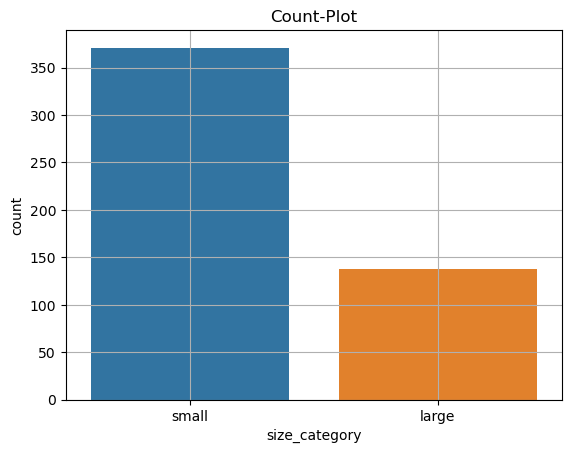

In [16]:
sns.countplot('size_category',data=forest_fires)
plt.title('Count-Plot')
plt.grid(True)
plt.show()

# Data Preparation

In [17]:
forest_fires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [18]:
#dropping month and day from our data,because dummy variables for these two variables are already present in our data

In [19]:
forest_fires.drop(['month','day'],axis=1,inplace=True)

In [20]:
forest_fires.head()


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [21]:
forest_fires.shape

(509, 29)

In [22]:
#converting target variable catergical to dummy variable
forest_fires['size_category']=pd.get_dummies(forest_fires['size_category'],drop_first=True)

In [23]:
forest_fires.head(3)

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1


In [24]:
forest_fires['size_category'].head()

0    1
1    1
2    1
3    1
4    1
Name: size_category, dtype: uint8

In [25]:
X = forest_fires.drop('size_category',axis=1)
y = forest_fires[['size_category']]

# Splitting into train and test

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [27]:
print('shape_X_train :',X_train.shape, '\nshape_y_train',y_train.shape)

shape_X_train : (407, 28) 
shape_y_train (407, 1)


In [28]:
print('shape_X_test :',X_test.shape, '\nshape_y_test',y_test.shape)

shape_X_test : (102, 28) 
shape_y_test (102, 1)


# Model Building || Model Training

In [29]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train,y_train)

SVC(random_state=42)

# Grid SearchCv

* To check which parameters are best for SVM.

In [30]:
grid_search = GridSearchCV(estimator = svm_model,
                           param_grid = {'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] },
                           cv=5)
grid_search.fit(X,y)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 15, 'gamma': 50, 'kernel': 'rbf'}
0.7288875946418172


In [31]:
svm_model_new = SVC(C=15,kernel='rbf',gamma=50,random_state=42)
svm_model_new.fit(X_train,y_train)

SVC(C=15, gamma=50, random_state=42)

# Model Testing

# train data

In [32]:
y_pred_train = svm_model_new.predict(X_train)

In [33]:
print('Accuracy_Score :',accuracy_score(y_train,y_pred_train))

Accuracy_Score : 1.0


In [34]:
confusion_matrix(y_train,y_pred_train)

array([[109,   0],
       [  0, 298]], dtype=int64)

In [35]:
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       109
           1       1.00      1.00      1.00       298

    accuracy                           1.00       407
   macro avg       1.00      1.00      1.00       407
weighted avg       1.00      1.00      1.00       407



# test data

In [36]:
y_pred_test = svm_model_new.predict(X_test)

In [37]:
print('Accuracy_Score :',accuracy_score(y_test,y_pred_test))

Accuracy_Score : 0.7156862745098039


In [38]:
confusion_matrix(y_test,y_pred_test)

array([[ 0, 29],
       [ 0, 73]], dtype=int64)

In [39]:
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.72      1.00      0.83        73

    accuracy                           0.72       102
   macro avg       0.36      0.50      0.42       102
weighted avg       0.51      0.72      0.60       102



# **=============================================================**

# 2) Prepare a classification model using SVM for salary data

Data Description:

* age -- age of a person
* workclass -- A work class is a grouping of work
* education -- Education of an individuals
* maritalstatus -- Marital status of an individulas
* occupation -- occupation of an individuals
* relationship --
* race -- Race of an Individual
* sex -- Gender of an Individual
* capitalgain -- profit received from the sale of an investment
* capitalloss -- A decrease in the value of a capital asset
* hoursperweek -- number of hours work per week
* native -- Native of an individual
* Salary -- salary of an individual

# Importing Data

In [40]:
 #data for training
salary_data_train = pd.read_csv('C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Excelr.dataset\\SalaryData_Train(1).csv')
salary_data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [41]:
#data for testing
salary_data_test = pd.read_csv('C:\\Users\\SARVESH SURVE\\OneDrive\\Desktop\\data\\Excelr.dataset\\SalaryData_Test(1).csv')

In [42]:
print('salary_data_train_shape :',salary_data_train.shape,'\nsalary_data_test_shape :',salary_data_test.shape)

salary_data_train_shape : (30161, 14) 
salary_data_test_shape : (15060, 14)


In [43]:
print('salary_data_train_null :\n',salary_data_train.isnull().sum(),'\n'
      '\nsalary_data_test_null :\n',salary_data_test.isnull().sum())

salary_data_train_null :
 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64 

salary_data_test_null :
 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [44]:
print('salary_data_train_duplicates :\n',salary_data_train.duplicated().sum(),'\n'
      '\nsalary_data_test_duplicates :\n',salary_data_test.duplicated().sum())

salary_data_train_duplicates :
 3258 

salary_data_test_duplicates :
 930


In [45]:
#dropping Duplicates in both training and testing data

In [46]:
salary_data_train.drop_duplicates(inplace=True)
salary_data_test.drop_duplicates(inplace=True)

In [47]:
print('salary_data_train_duplicates :\n',salary_data_train.duplicated().sum(),'\n'
      '\nsalary_data_test_duplicates :\n',salary_data_test.duplicated().sum())

salary_data_train_duplicates :
 0 

salary_data_test_duplicates :
 0


In [48]:
# there are no any duplicate rows and no any null values in our both training and tesing datasets

In [49]:
#after dropping duplicates shape will:
print('salary_data_train_shape :',salary_data_train.shape,'\nsalary_data_test_shape :',salary_data_test.shape)

salary_data_train_shape : (26903, 14) 
salary_data_test_shape : (14130, 14)


In [50]:
print('salary_data_train_dtypes :\n',salary_data_train.nunique(),'\n',
      '\nsalary_data_test_dtypes :\n',salary_data_test.nunique())

salary_data_train_dtypes :
 age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64 
 
salary_data_test_dtypes :
 age               73
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      110
capitalloss       79
hoursperweek      89
native            40
Salary             2
dtype: int64


In [51]:
print('salary_data_train_dtypes :\n',salary_data_train.dtypes,'\n',
      '\nsalary_data_test_dtypes :\n',salary_data_test.dtypes)

salary_data_train_dtypes :
 age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object 
 
salary_data_test_dtypes :
 age               int64
workclass        object
education        object
educationno       int64
maritalstatus    object
occupation       object
relationship     object
race             object
sex              object
capitalgain       int64
capitalloss       int64
hoursperweek      int64
native           object
Salary           object
dtype: object


In [52]:
#converting object data types to numeric (encoding)

In [53]:
#encoding for training data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
salary_data_train['workclass'] = label_encoder.fit_transform(salary_data_train['workclass'])
salary_data_train['education'] = label_encoder.fit_transform(salary_data_train['education'])
salary_data_train['maritalstatus'] = label_encoder.fit_transform(salary_data_train['maritalstatus'])
salary_data_train['occupation'] = label_encoder.fit_transform(salary_data_train['occupation'])
salary_data_train['relationship'] = label_encoder.fit_transform(salary_data_train['relationship'])
salary_data_train['race'] = label_encoder.fit_transform(salary_data_train['race'])
salary_data_train['sex'] = label_encoder.fit_transform(salary_data_train['sex'])
salary_data_train['native'] = label_encoder.fit_transform(salary_data_train['native'])
salary_data_train['Salary'] = label_encoder.fit_transform(salary_data_train['Salary'])

salary_data_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [54]:
#encoding for test data
salary_data_test['workclass'] = label_encoder.fit_transform(salary_data_test['workclass'])
salary_data_test['education'] = label_encoder.fit_transform(salary_data_test['education'])
salary_data_test['maritalstatus'] = label_encoder.fit_transform(salary_data_test['maritalstatus'])
salary_data_test['occupation'] = label_encoder.fit_transform(salary_data_test['occupation'])
salary_data_test['relationship'] = label_encoder.fit_transform(salary_data_test['relationship'])
salary_data_test['race'] = label_encoder.fit_transform(salary_data_test['race'])
salary_data_test['sex'] = label_encoder.fit_transform(salary_data_test['sex'])
salary_data_test['native'] = label_encoder.fit_transform(salary_data_test['native'])
salary_data_test['Salary'] = label_encoder.fit_transform(salary_data_test['Salary'])

salary_data_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [55]:
print('salary_data_train_dtypes :\n',salary_data_train.dtypes,'\n',
      '\nsalary_data_test_dtypes :\n',salary_data_test.dtypes)

salary_data_train_dtypes :
 age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object 
 
salary_data_test_dtypes :
 age              int64
workclass        int32
education        int32
educationno      int64
maritalstatus    int32
occupation       int32
relationship     int32
race             int32
sex              int32
capitalgain      int64
capitalloss      int64
hoursperweek     int64
native           int32
Salary           int32
dtype: object


# Data Preparation

In [56]:
X_train = salary_data_train.drop('Salary',axis=1)
y_train = salary_data_train[['Salary']]

In [57]:
print('Shape_X_train :',X_train.shape,'\nShape_y_train :',y_train.shape)

Shape_X_train : (26903, 13) 
Shape_y_train : (26903, 1)


In [58]:
X_test = salary_data_test.drop('Salary',axis=1)
y_test = salary_data_test[['Salary']]

In [59]:
print('Shape_X_test :',X_test.shape,'\nShape_y_test :',y_test.shape)

Shape_X_test : (14130, 13) 
Shape_y_test : (14130, 1)


# Model Building || Model Training

In [60]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train,y_train)

SVC(random_state=42)

# Model Testing

# train data

In [61]:
y_pred_train = svm_model.predict(X_train)

In [62]:
print('Accuracy_Score :',accuracy_score(y_train,y_pred_train))

Accuracy_Score : 0.7940378396461362


In [64]:
confusion_matrix(y_train,y_pred_train)

array([[19322,   701],
       [ 4840,  2040]], dtype=int64)

In [65]:
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87     20023
           1       0.74      0.30      0.42      6880

    accuracy                           0.79     26903
   macro avg       0.77      0.63      0.65     26903
weighted avg       0.79      0.79      0.76     26903



# test data

In [66]:
y_pred_test = svm_model.predict(X_test)

In [67]:
print('Accuracy_Score :',accuracy_score(y_test,y_pred_test))

Accuracy_Score : 0.7960368011323425


In [68]:
confusion_matrix(y_test,y_pred_test)

array([[10257,   363],
       [ 2519,   991]], dtype=int64)

In [69]:
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88     10620
           1       0.73      0.28      0.41      3510

    accuracy                           0.80     14130
   macro avg       0.77      0.62      0.64     14130
weighted avg       0.79      0.80      0.76     14130



# **=============================================================**